In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('New Dataframe.csv')

# Separate features and target variable (replace 'Target' with your actual target column name)
X = df.drop(columns=['Target'])
y = df['Target']

# Split the data: 65% training, 20% validation, 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)

# Initialize and train AdaBoost Regressor
model = AdaBoostRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Function to calculate evaluation metrics
def evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return round(r2, 2), round(medae, 2), round(mae, 2), round(rmse, 2)

# Function to calculate additional statistics
def calculate_statistics(y_pred):
    std_dev = np.std(y_pred)
    avg = np.mean(y_pred)
    min_val = np.min(y_pred)
    max_val = np.max(y_pred)
    return round(std_dev, 2), round(avg, 2), round(min_val, 2), round(max_val, 2)

# Validation set evaluation
val_r2, val_medae, val_mae, val_rmse = evaluate(y_val, y_val_pred)
val_std_dev, val_avg, val_min, val_max = calculate_statistics(y_val_pred)
print("Validation Metrics:")
print(f"R²: {val_r2}, MedAE: {val_medae}, MAE: {val_mae}, RMSE: {val_rmse}")
print(f"Std Dev: {val_std_dev}, Avg: {val_avg}, Min: {val_min}, Max: {val_max}")

# Test set evaluation
test_r2, test_medae, test_mae, test_rmse = evaluate(y_test, y_test_pred)
test_std_dev, test_avg, test_min, test_max = calculate_statistics(y_test_pred)
print("\nTest Metrics:")
print(f"R²: {test_r2}, MedAE: {test_medae}, MAE: {test_mae}, RMSE: {test_rmse}")
print(f"Std Dev: {test_std_dev}, Avg: {test_avg}, Min: {test_min}, Max: {test_max}")

Validation Metrics:
R²: 0.65, MedAE: 0.0, MAE: 39.74, RMSE: 123.66
Std Dev: 210.73, Avg: 177.37, Min: 0.0, Max: 506.0

Test Metrics:
R²: 0.69, MedAE: 9.61, MAE: 46.24, RMSE: 122.74
Std Dev: 212.54, Avg: 234.26, Min: 0.0, Max: 504.5


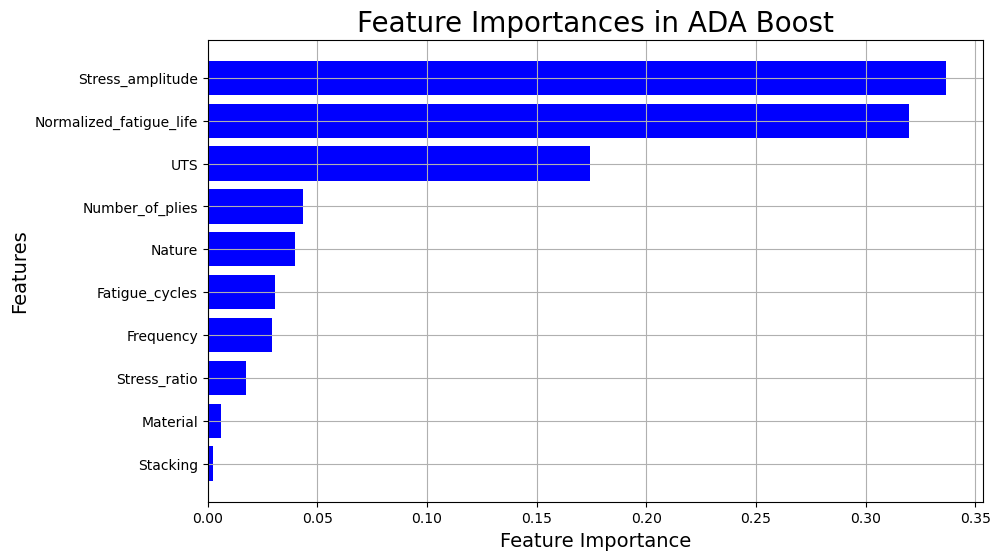

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
feature_importances = model.feature_importances_
features = X.columns

# Combine and sort feature importances
importance_data = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_data = importance_data.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_data['Feature'], importance_data['Importance'], color='blue')
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importances in ADA Boost", fontsize=20)
plt.grid(True)

# Save the plot as an image
plt.savefig('ADAB.tiff', bbox_inches='tight', pad_inches=0.1)

plt.show()

In [2]:
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('New Dataframe.csv')

# Separate features and target variable (replace 'Target' with your actual target column name)
X = df.drop(columns=['Target'])
y = df['Target']

# Split the data: 65% training, 20% validation, 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Initialize AdaBoost Regressor and GridSearchCV with 5-fold cross-validation
base_model = AdaBoostRegressor(random_state=42)
GB_GS = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model with GridSearchCV on the training data
GB_GS.fit(X_train, y_train)

# Display best parameters and R² score of the cross-validation
print("Best Parameters:", GB_GS.best_params_)
print("Best CV R²:", round(GB_GS.best_score_, 2))

# Predict and evaluate on validation and test sets using the best model
best_model = GB_GS.best_estimator_
y_val_pred = best_model.predict(X_val)
y_test_pred_gs = best_model.predict(X_test)

# Define a function for calculating evaluation metrics
def evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return round(r2, 2), round(medae, 2), round(mae, 2), round(rmse, 2)

# Define a function for additional statistics
def calculate_statistics(y_pred):
    std_dev = np.std(y_pred)
    avg = np.mean(y_pred)
    min_val = np.min(y_pred)
    max_val = np.max(y_pred)
    return round(std_dev, 2), round(avg, 2), round(min_val, 2), round(max_val, 2)

# Validation set evaluation
val_r2, val_medae, val_mae, val_rmse = evaluate(y_val, y_val_pred)
val_std_dev, val_avg, val_min, val_max = calculate_statistics(y_val_pred)
print("\nValidation Metrics:")
print(f"R²: {val_r2}, MedAE: {val_medae}, MAE: {val_mae}, RMSE: {val_rmse}")
print(f"Std Dev: {val_std_dev}, Avg: {val_avg}, Min: {val_min}, Max: {val_max}")

# Test set evaluation
test_r2, test_medae, test_mae, test_rmse = evaluate(y_test, y_test_pred_gs)
test_std_dev, test_avg, test_min, test_max = calculate_statistics(y_test_pred_gs)
print("\nTest Metrics:")
print(f"R²: {test_r2}, MedAE: {test_medae}, MAE: {test_mae}, RMSE: {test_rmse}")
print(f"Std Dev: {test_std_dev}, Avg: {test_avg}, Min: {test_min}, Max: {test_max}")

Best Parameters: {'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50}
Best CV R²: 0.95

Validation Metrics:
R²: 0.66, MedAE: 0.0, MAE: 42.68, RMSE: 121.94
Std Dev: 205.7, Avg: 173.06, Min: 0.0, Max: 507.29

Test Metrics:
R²: 0.66, MedAE: 7.92, MAE: 50.87, RMSE: 128.31
Std Dev: 207.66, Avg: 228.66, Min: 0.0, Max: 506.42


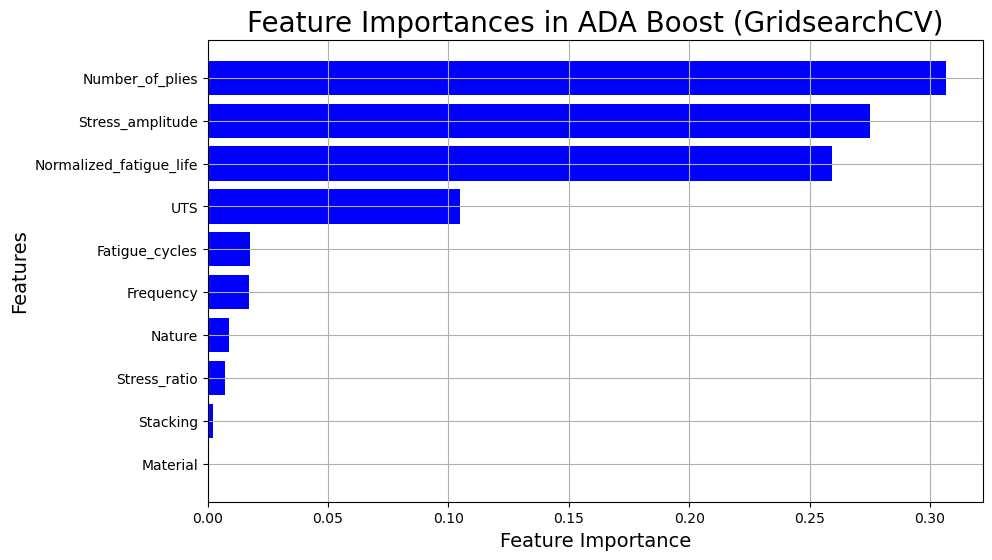

In [ ]:
import matplotlib.pyplot as plt

# Extract feature importances from the best model
feature_importances = best_model.feature_importances_
features = X.columns

# Combine and sort feature importances
importance_data = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_data = importance_data.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_data['Feature'], importance_data['Importance'], color='blue')
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importances in ADA Boost (GridsearchCV)", fontsize=20)
plt.grid(True)

# Save the plot as an image
plt.savefig('ADAB GS.tiff', bbox_inches='tight', pad_inches=0.1)

plt.show()

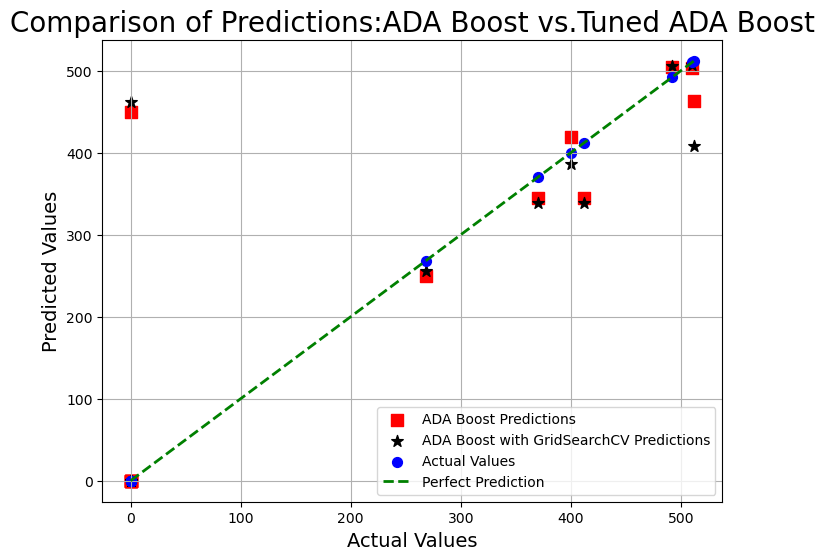

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot to compare predictions
plt.figure(figsize=(8, 6))

# Plot the actual vs predicted values for the untuned model
plt.scatter(y_test, y_test_pred, marker='s', color='red', s=75, label='ADA Boost Predictions')

# Plot the actual vs predicted values for the tuned model
plt.scatter(y_test, y_test_pred_gs, marker='*', color='black', s=75, label='ADA Boost with GridSearchCV Predictions')

# Actual values (Round markers, green color)
plt.scatter(y_test, y_test, marker='o', color='blue', s=50, label="Actual Values")

# Add a diagonal line representing perfect predictions (y_test = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Comparison of Predictions:ADA Boost vs.Tuned ADA Boost', fontsize=20)
plt.legend()
plt.grid(True)

# Save the plot as an image
plt.savefig('ADA vs ADA with gridserach.tiff', bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()